In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno

In [2]:
import os
os.getcwd()

'/Users/macbookair/Library/CloudStorage/OneDrive-UniversidaddelosAndes/Universidad/Maestria/2023-2/Big Data y Machine Learning/Taller 1'

In [3]:
ruta = '/Users/macbookair/Desktop/Taller 1'
os.chdir(ruta)

FileNotFoundError: [Errno 2] No such file or directory: '/Users/macbookair/Desktop/Taller 1'

In [4]:
data = pd.read_csv('nuevo_archivo.csv', encoding = 'latin_1')

In [5]:
#Identificamos algunas variables que no usaremos
c_eliminar = [col for col in data.columns if col.startswith('p')]
salarios = data.drop(c_eliminar, axis=1, inplace = True)

In [6]:
#Identificamos algunas variables que no usaremos
c_eliminar = [col for col in data.columns if col.startswith('io')]
salarios = data.drop(c_eliminar, axis=1, inplace = True)

In [7]:
#Identificamos algunas variables que no usaremos
c_eliminar = [col for col in data.columns if col.startswith('cc')]
salarios = data.drop(c_eliminar, axis=1, inplace = True)

<Axes: >

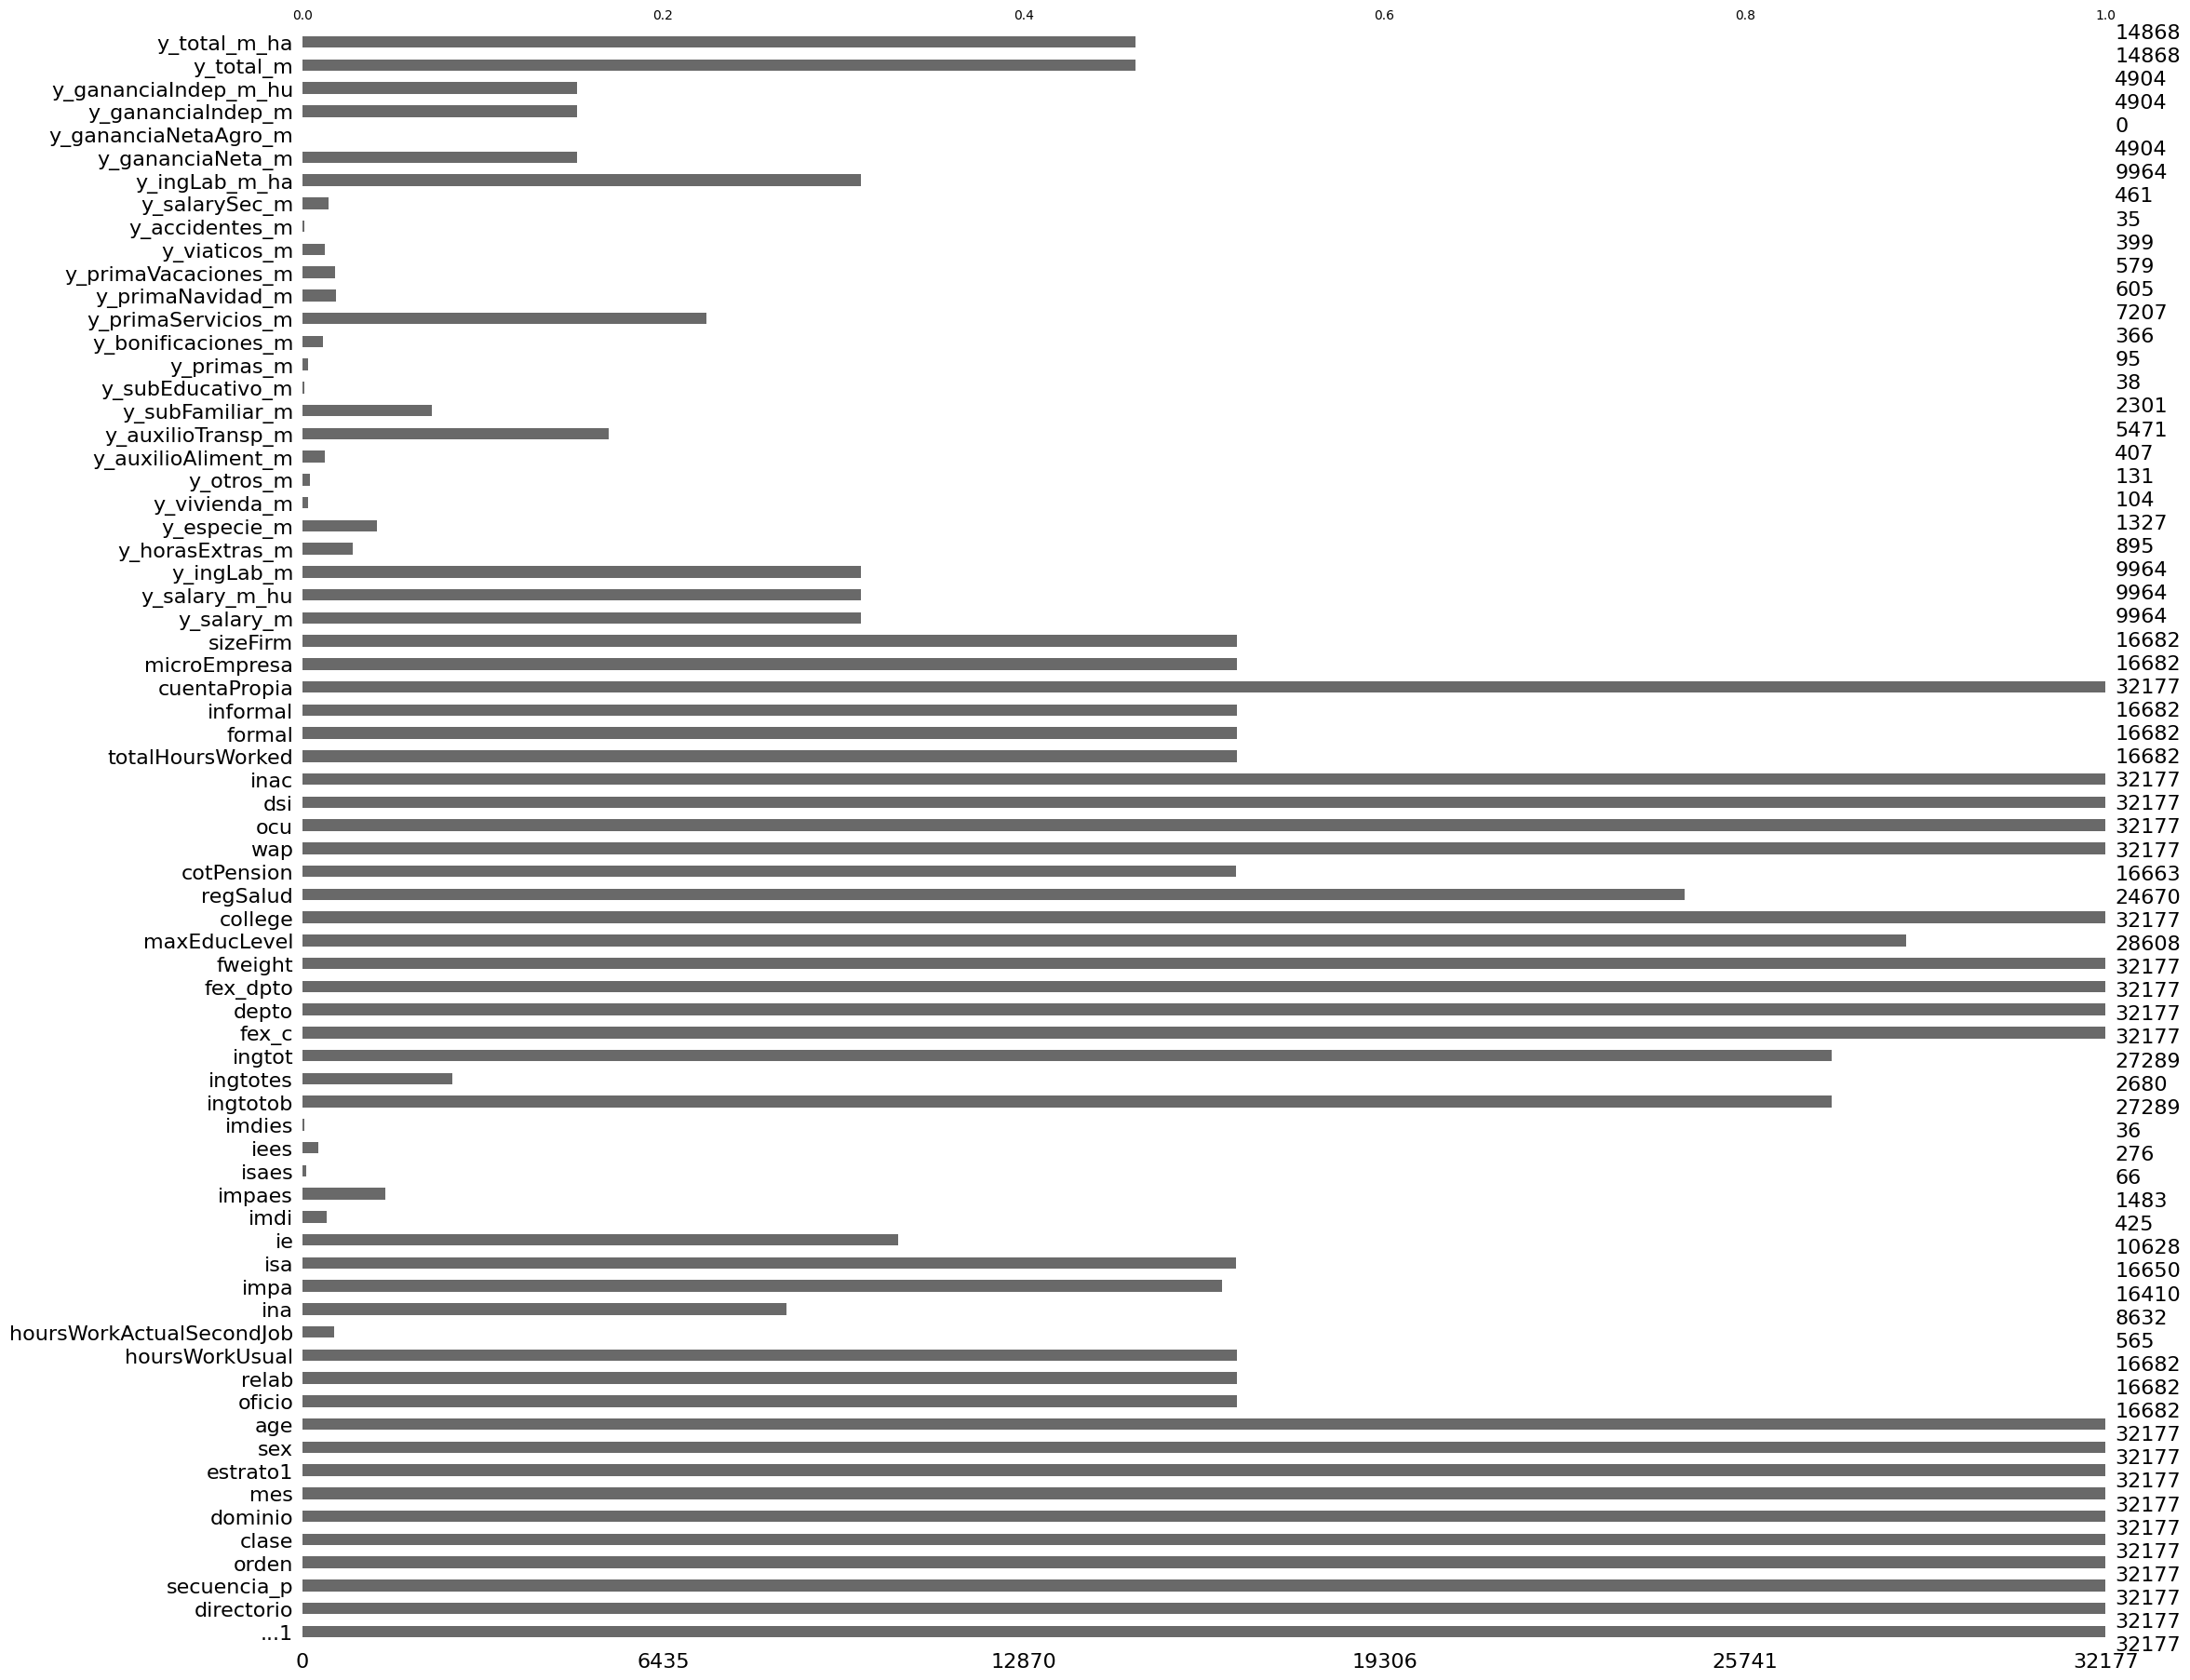

In [8]:
#Comenzamos a ver missing values
msno.bar(data)
#Identificamos y_gananciaNetaAgro_m como variable sin valores

In [9]:
data.drop(['y_gananciaNetaAgro_m'], axis=1, inplace = True)

In [10]:
#Revisamos si existen columnas duplicadas
duplicados = data.duplicated(keep = False)
duplicados.unique()

array([False])

In [11]:
especificacion = [False, 'first', 'last']
duplicados_resultados = []

for j in especificacion:
    duplicados = data.duplicated(keep = j)
    duplicados_resultados.append(duplicados)

duplicados_true = any(resultado.any() for resultado in duplicados_resultados)

if duplicados_true:
    print("Se encontraron duplicados")
else:
    print("No se encontraron duplicados")

No se encontraron duplicados


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32177 entries, 0 to 32176
Data columns (total 69 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ...1                      32177 non-null  int64  
 1   directorio                32177 non-null  int64  
 2   secuencia_p               32177 non-null  int64  
 3   orden                     32177 non-null  int64  
 4   clase                     32177 non-null  int64  
 5   dominio                   32177 non-null  object 
 6   mes                       32177 non-null  int64  
 7   estrato1                  32177 non-null  int64  
 8   sex                       32177 non-null  int64  
 9   age                       32177 non-null  int64  
 10  oficio                    16682 non-null  float64
 11  relab                     16682 non-null  float64
 12  hoursWorkUsual            16682 non-null  float64
 13  hoursWorkActualSecondJob  565 non-null    float64
 14  ina   

<Axes: >

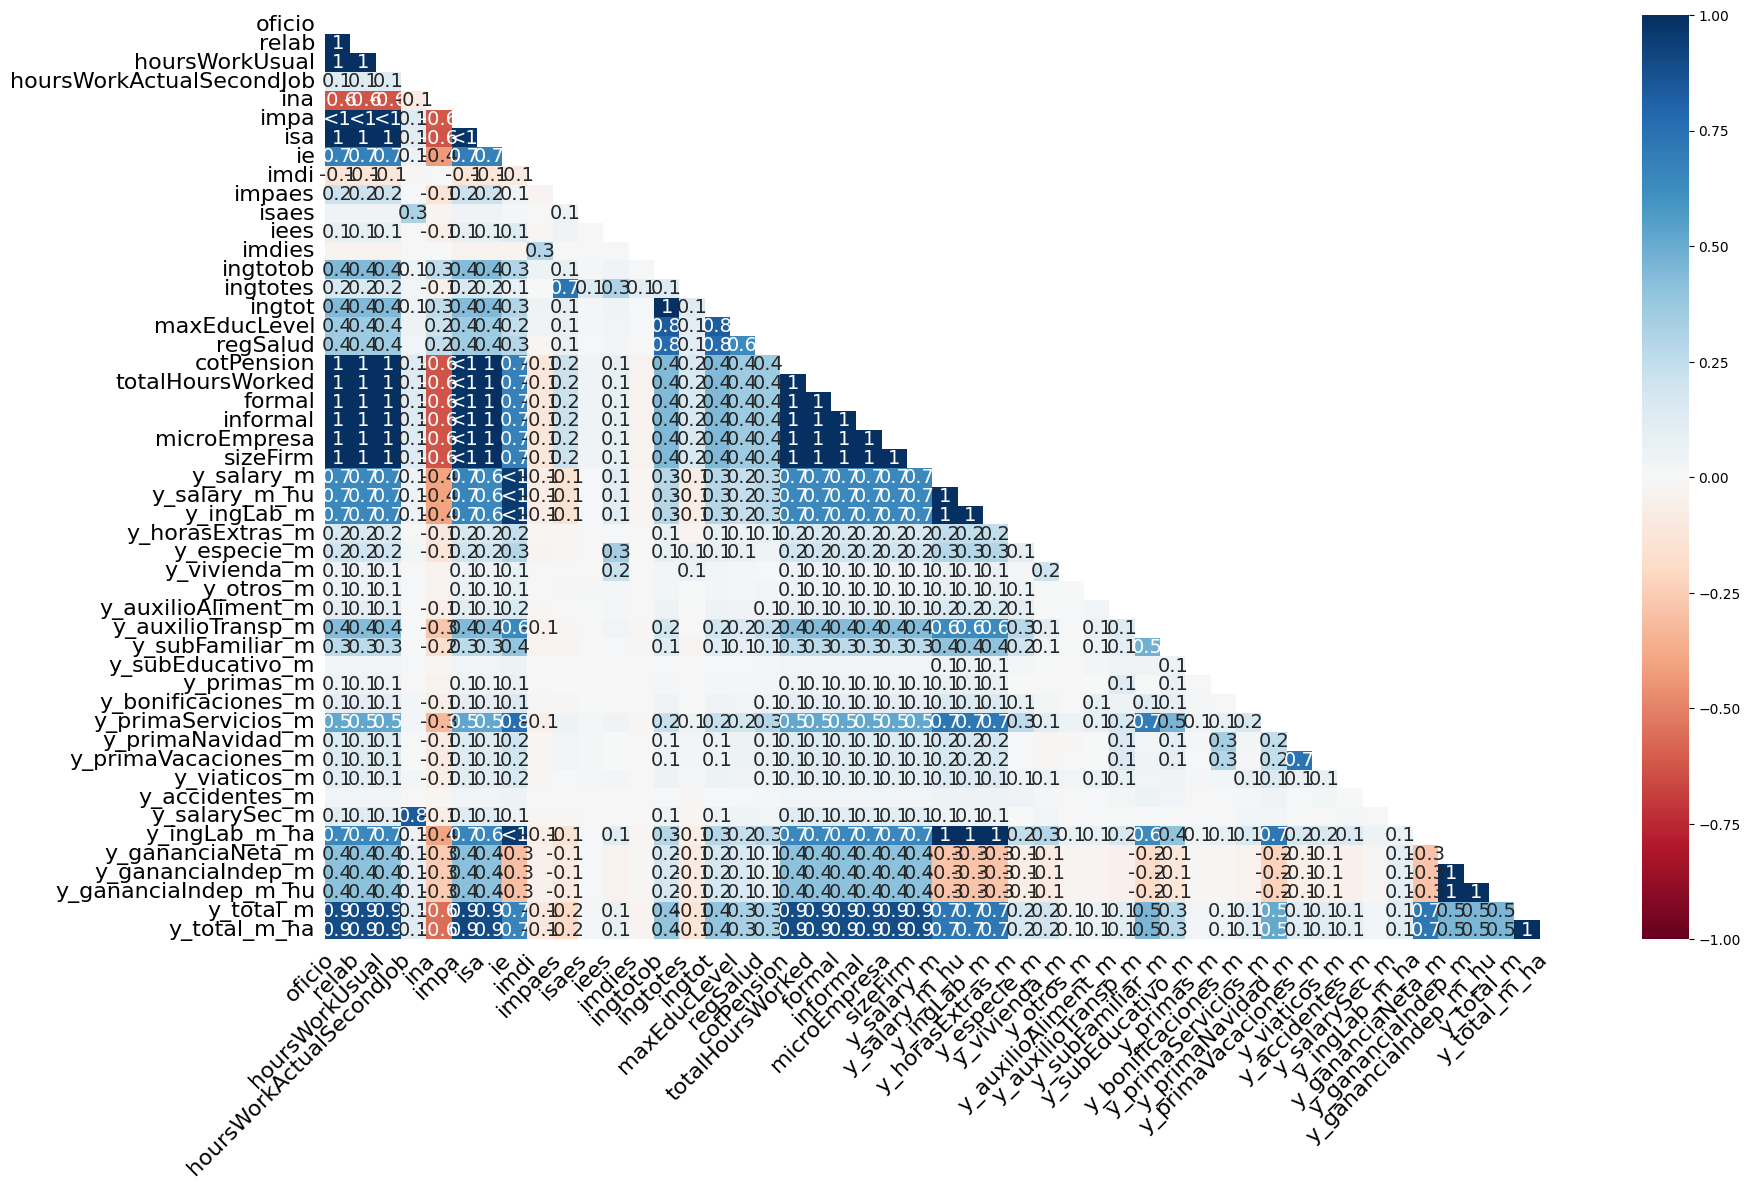

In [13]:
#Luego de realizar una primera limpieza
#Analizamos la correlacion entre missing values
msno.heatmap(data)

<Axes: >

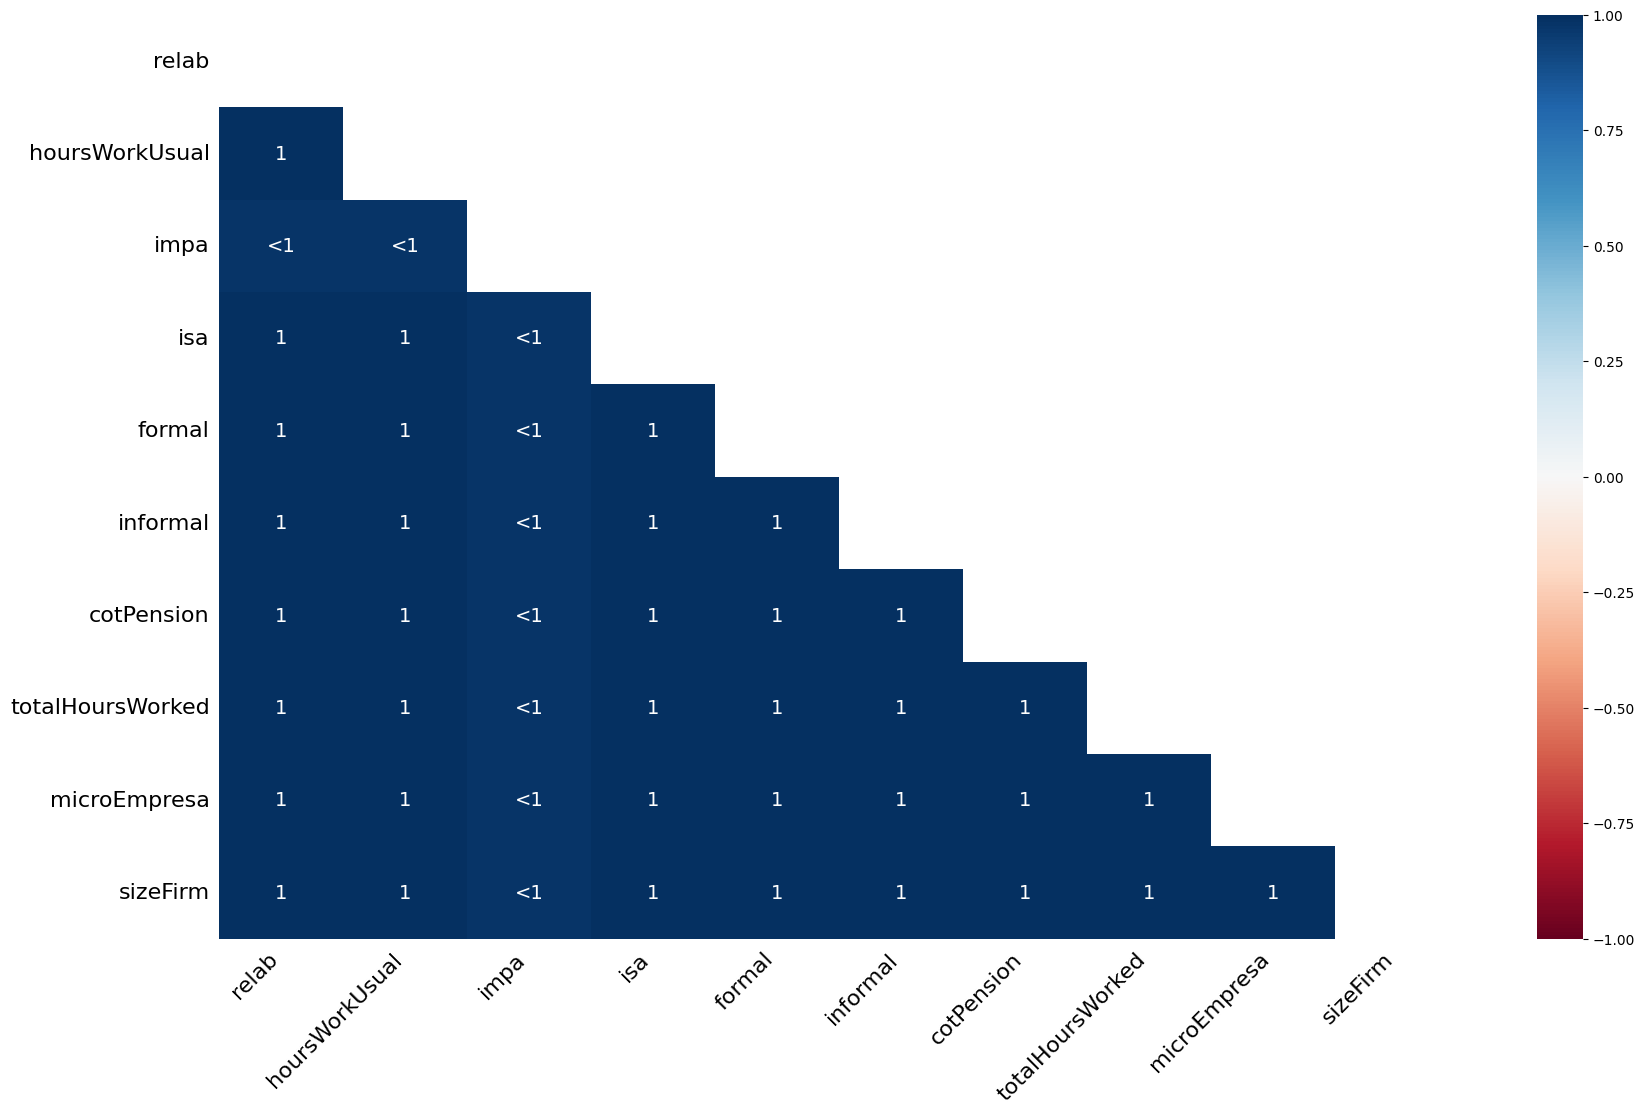

In [18]:
perfect_cor = ['relab', 'hoursWorkUsual', 'impa', 'isa',
                'formal', 'informal', 'cotPension', 'totalHoursWorked',
                'microEmpresa', 'sizeFirm']
subset_data = data[perfect_cor]
msno.heatmap(subset_data)